# Oriented FAST and Rotated BRIEF (ORB)

# Introduction

* In order to perform this object-based image analysis, we will use ORB
* ORB has some great properties, such as being invariant to rotations,
changes in illumination, and noise.

# Loading Images and Importing Resources
We will use a woman's face as our training image.

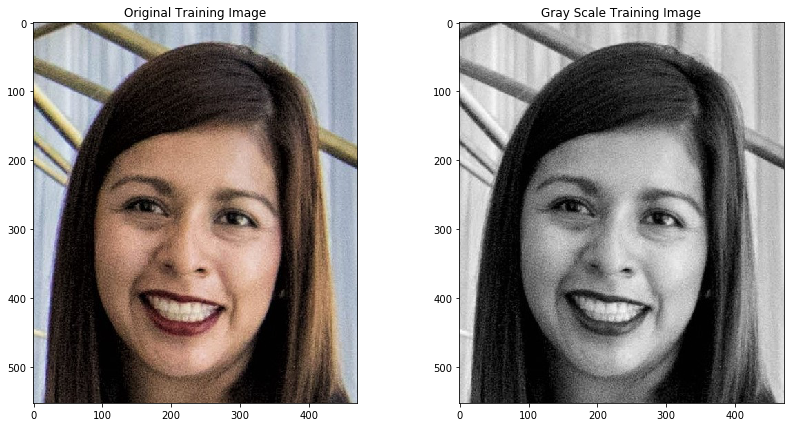

In [26]:
import cv2
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Users\atavares\PycharmProjects\ComputerVision')

# Set the default figure size
file_path = 'data/images/face.jpeg'
image = cv2.imread(file_path)

# Convert the training image to RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray Scale
training_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the images
plt.subplot(121)
plt.title('Original Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Gray Scale Training Image')
plt.imshow(training_gray, cmap = 'gray')
plt.show()

# Locating Keypoints
The first step in the ORB algorithm is to locate all the keypoints in the training image.
After the keypoints have been located, ORB Creates their corresponding binary feature
vectors and groups them together in the ORB descriptor

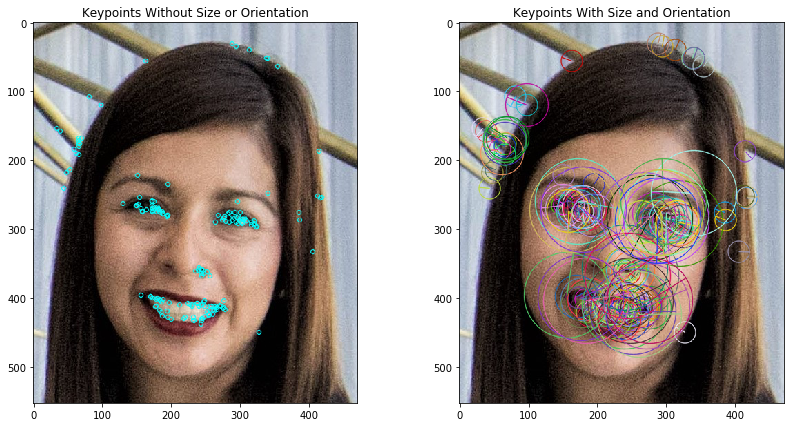


Number of keypoints Detected:  175


In [27]:
# Import copy to make copies of the training image
import copy

# set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints
# to locate and the pyramid decimation ration
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

# Create copies of the training image to draw our keypoints on
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation on one copy of the training image
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 255))

# Draw the keypoints with size or orientation on one copy of the training image
cv2.drawKeypoints(training_image, keypoints, keyp_with_size,
                  flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with the keypoints without size or orientation
plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

## Feature Matching
At this point, we already have the ORB descriptors and the query images;
The final step is to perform keypoint matching between the two images
using their corresponding ORB descriptors.

In [28]:
def pre_pipe(file_path):
    # Load the training image
    image = cv2.imread(file_path)

    # convert the training image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to gray scale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image, image_gray

def orb_pipe(image_gray):
    # Set the parameters of the ORB algorithm by specifying the maximum number
    # the pyramid decimation ratio
    orb = cv2.ORB_create(1000, 2.0)

    # Find the keypoints in the gray scale image and compute their ORB descriptor
    keypoints, descriptors = orb.detectAndCompute(image_gray, None)

    return keypoints, descriptors


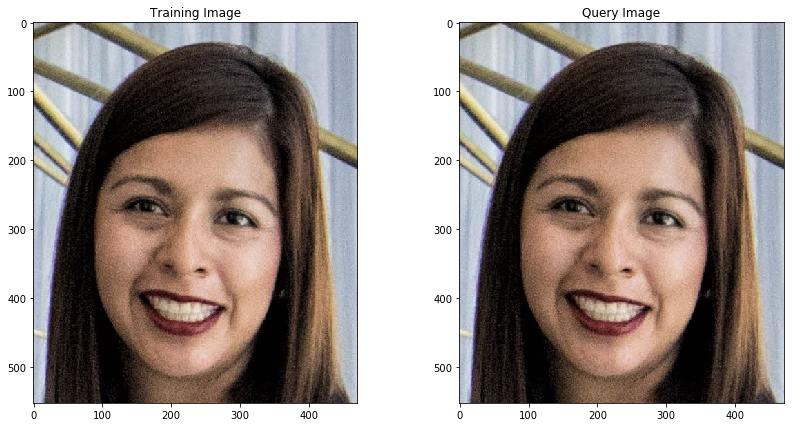

In [29]:
training_img_path = 'data/images/face.jpeg'
training_img, training_img_gray = pre_pipe(training_img_path)

query_img_path = 'data/images/face.jpeg'
query_img, query_img_gray = pre_pipe(training_img_path)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_img)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_img)
plt.show()

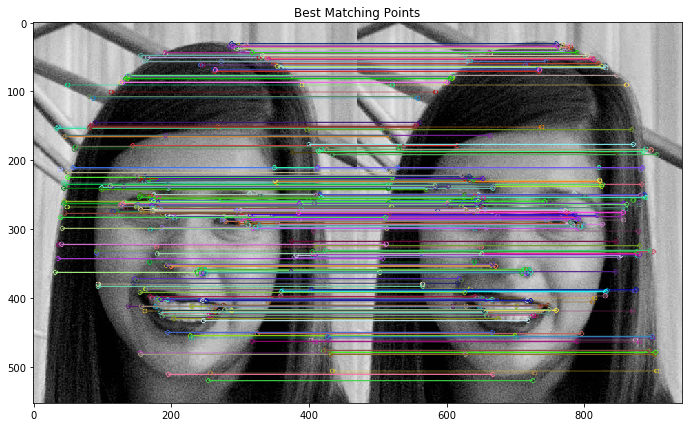

In [30]:
keypoints_query, descriptors_query = orb_pipe(query_img_gray)
keypoints_train, descriptors_train = orb_pipe(training_img_gray)

# Create a Brute Force Matcher object. Set crosscheck to true so that the BHMatcher
# will return only consistent pairs.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query img
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want.
# So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the
# query image.
# The best matches correspond to the first elements in the sorted matches list.
# We draw the first 300 matches and use flags = 2 to plot the matching keypoints
# without size or orientation
result = cv2.drawMatches(training_img_gray, keypoints_train,
                         query_img_gray, keypoints_query,
                         matches[:300], query_img_gray, flags=2)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

## ORB's Main Properties
* Scale Invariance
* Rotational Invariance
* Illumination Invariance
* Noise Invariance


## Scale

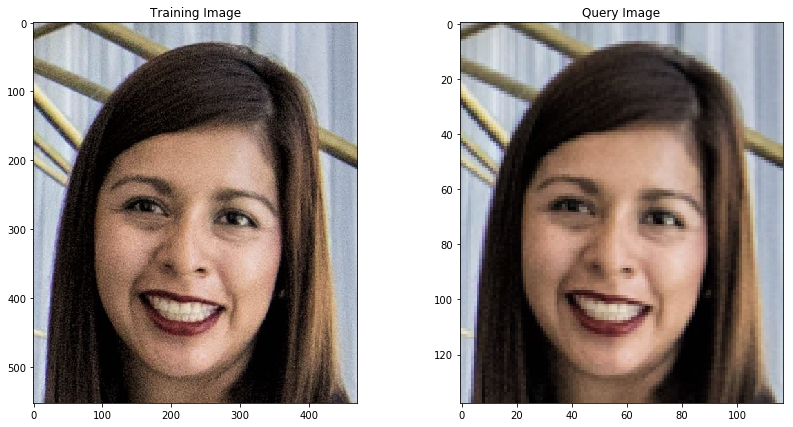

In [31]:
training_img_path = 'data/images/face.jpeg'
training_img, training_img_gray = pre_pipe(training_img_path)

query_img_path = 'data/images/faceQS.png'
query_img, query_img_gray = pre_pipe(query_img_path)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_img)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_img)
plt.show()

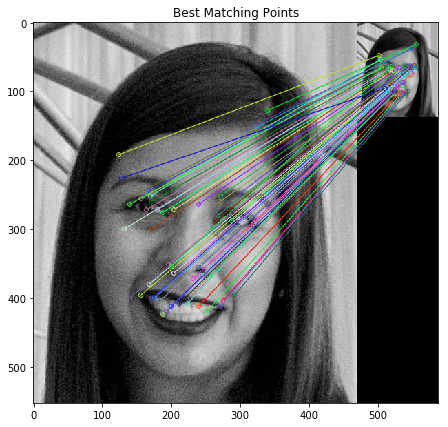


The Training Image has shape: (553, 471)
The Query Image has shape: (138, 117)

Number of Keypoints Detected In The Training Image:  822
Number of Keypoints Detected In The Query Image:  65

Number of Matching Keypoints Between The Training and Query Images:  59


In [32]:
keypoints_query, descriptors_query = orb_pipe(query_img_gray)
keypoints_train, descriptors_train = orb_pipe(training_img_gray)

# Create a Brute Force Matcher object. Set crosscheck to true so that the BHMatcher
# will return only consistent pairs.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query img
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want.
# So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the
# query image.
# The best matches correspond to the first elements in the sorted matches list.
# We draw the first 300 matches and use flags = 2 to plot the matching keypoints
# without size or orientation
result = cv2.drawMatches(training_img_gray, keypoints_train,
                         query_img_gray, keypoints_query,
                         matches[:300], query_img_gray, flags=2)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the shape of the training image
print('\nThe Training Image has shape:', training_gray.shape)

#Print the shape of the query image
print('The Query Image has shape:', query_img_gray.shape)

# Print the number of keypoints detected in the training image
print("\nNumber of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## Rotation

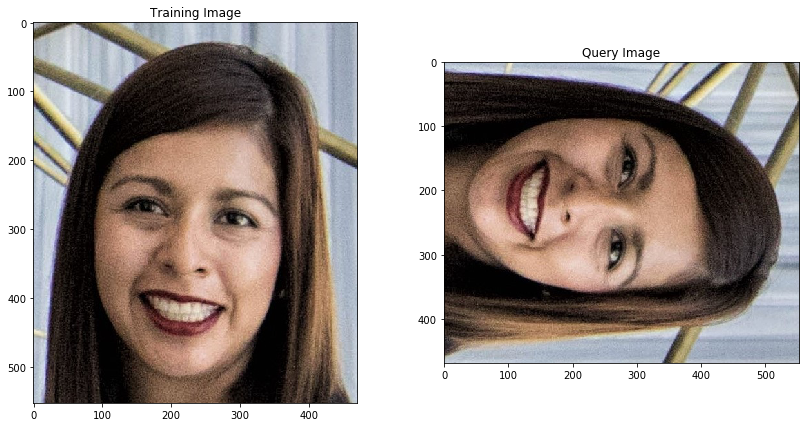

In [33]:
training_img_path = 'data/images/face.jpeg'
training_img, training_img_gray = pre_pipe(training_img_path)

query_img_path = 'data/images/faceR.jpeg'
query_img, query_img_gray = pre_pipe(query_img_path)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_img)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_img)
plt.show()

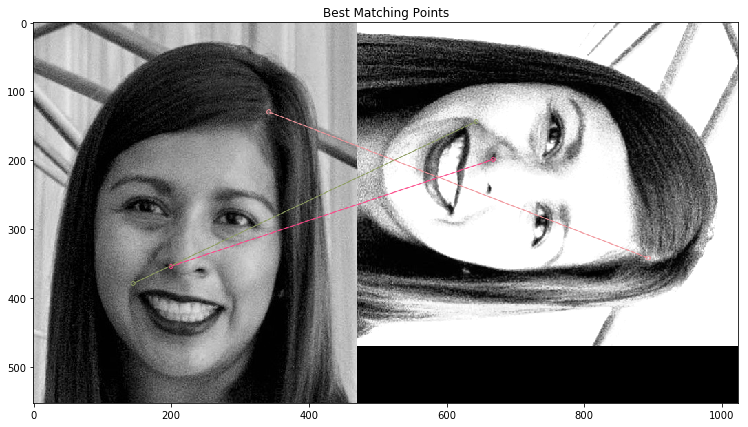


The Training Image has shape: (553, 471)
The Query Image has shape: (470, 553)

Number of Keypoints Detected In The Training Image:  822
Number of Keypoints Detected In The Query Image:  846

Number of Matching Keypoints Between The Training and Query Images:  502


In [39]:
keypoints_query, descriptors_query = orb_pipe(query_img_gray)
keypoints_train, descriptors_train = orb_pipe(training_img_gray)

# Create a Brute Force Matcher object. Set crosscheck to true so that the BHMatcher
# will return only consistent pairs.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query img
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want.
# So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the
# query image.
# The best matches correspond to the first elements in the sorted matches list.
# We draw the first 300 matches and use flags = 2 to plot the matching keypoints
# without size or orientation
result = cv2.drawMatches(training_img_gray, keypoints_train,
                         query_img_gray, keypoints_query,
                         matches[:30], query_img_gray, flags=2)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the shape of the training image
print('\nThe Training Image has shape:', training_gray.shape)

#Print the shape of the query image
print('The Query Image has shape:', query_img_gray.shape)

# Print the number of keypoints detected in the training image
print("\nNumber of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## Noise Invariance

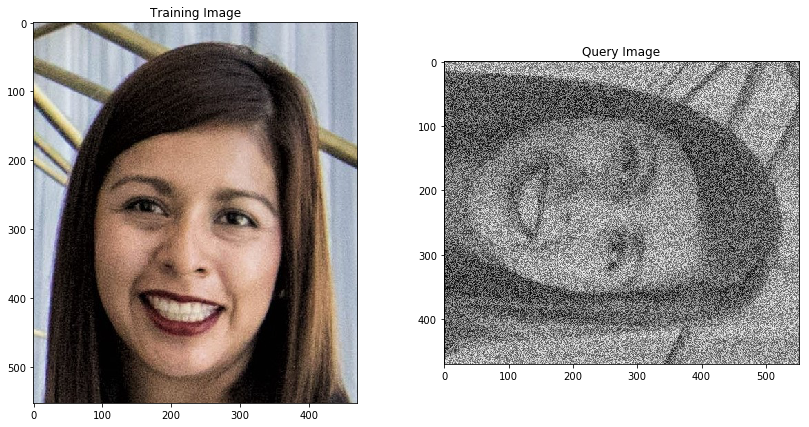

In [35]:
training_img_path = 'data/images/face.jpeg'
training_img, training_img_gray = pre_pipe(training_img_path)

query_img_path = 'data/images/faceRN5.png'
query_img, query_img_gray = pre_pipe(query_img_path)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_img)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_img)
plt.show()

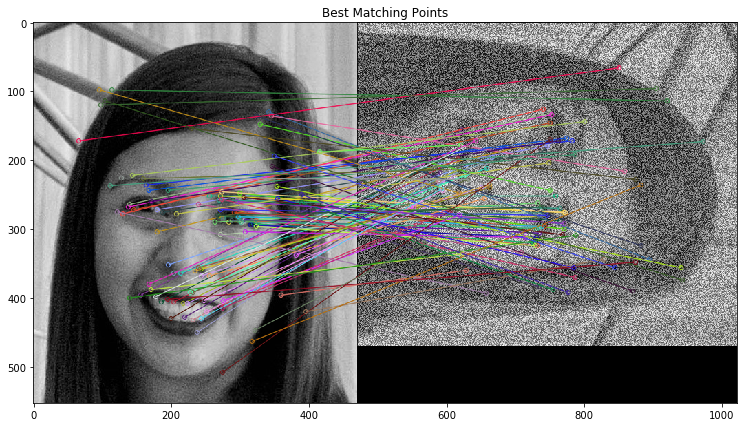


The Training Image has shape: (553, 471)
The Query Image has shape: (470, 552)

Number of Keypoints Detected In The Training Image:  822
Number of Keypoints Detected In The Query Image:  878

Number of Matching Keypoints Between The Training and Query Images:  491


In [36]:
keypoints_query, descriptors_query = orb_pipe(query_img_gray)
keypoints_train, descriptors_train = orb_pipe(training_img_gray)

# Create a Brute Force Matcher object. Set crosscheck to true so that the BHMatcher
# will return only consistent pairs.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query img
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want.
# So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the
# query image.
# The best matches correspond to the first elements in the sorted matches list.
# We draw the first 300 matches and use flags = 2 to plot the matching keypoints
# without size or orientation
result = cv2.drawMatches(training_img_gray, keypoints_train,
                         query_img_gray, keypoints_query,
                         matches[:100], query_img_gray, flags=2)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the shape of the training image
print('\nThe Training Image has shape:', training_gray.shape)

#Print the shape of the query image
print('The Query Image has shape:', query_img_gray.shape)

# Print the number of keypoints detected in the training image
print("\nNumber of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))


## Illumination Invariance

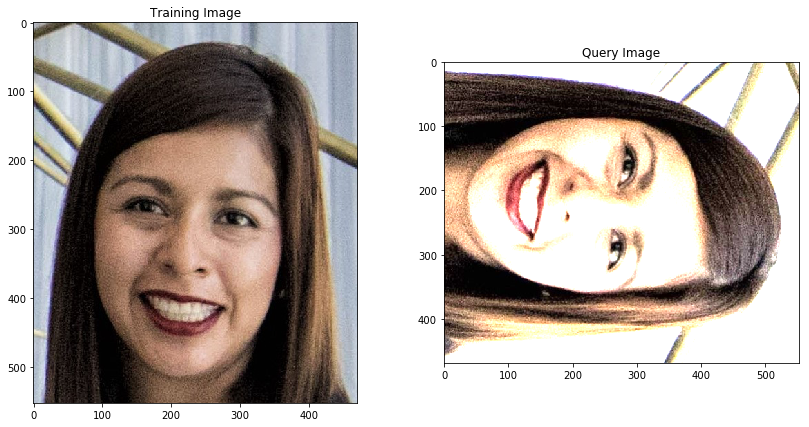

In [37]:
training_img_path = 'data/images/face.jpeg'
training_img, training_img_gray = pre_pipe(training_img_path)

query_img_path = 'data/images/faceRI.png'
query_img, query_img_gray = pre_pipe(query_img_path)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_img)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_img)
plt.show()

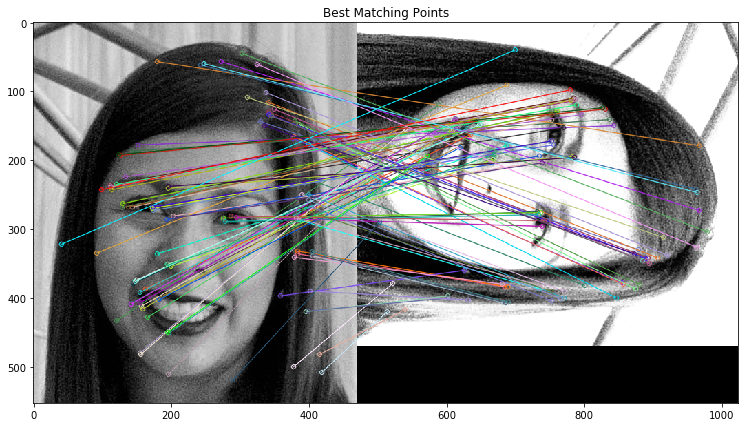


The Training Image has shape: (553, 471)
The Query Image has shape: (470, 553)

Number of Keypoints Detected In The Training Image:  822
Number of Keypoints Detected In The Query Image:  846

Number of Matching Keypoints Between The Training and Query Images:  502


In [38]:
keypoints_query, descriptors_query = orb_pipe(query_img_gray)
keypoints_train, descriptors_train = orb_pipe(training_img_gray)

# Create a Brute Force Matcher object. Set crosscheck to true so that the BHMatcher
# will return only consistent pairs.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query img
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want.
# So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the
# query image.
# The best matches correspond to the first elements in the sorted matches list.
# We draw the first 300 matches and use flags = 2 to plot the matching keypoints
# without size or orientation
result = cv2.drawMatches(training_img_gray, keypoints_train,
                         query_img_gray, keypoints_query,
                         matches[:100], query_img_gray, flags=2)

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the shape of the training image
print('\nThe Training Image has shape:', training_gray.shape)

#Print the shape of the query image
print('The Query Image has shape:', query_img_gray.shape)

# Print the number of keypoints detected in the training image
print("\nNumber of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))



